In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/speech'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_speech_LR_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_speech_LR_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_speech/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1071,)

In [3]:
pred = old_prediction

In [4]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

713

# can find smallest k

In [5]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

713

In [6]:
np.mean(app_k_nonon)

415.27208976157084

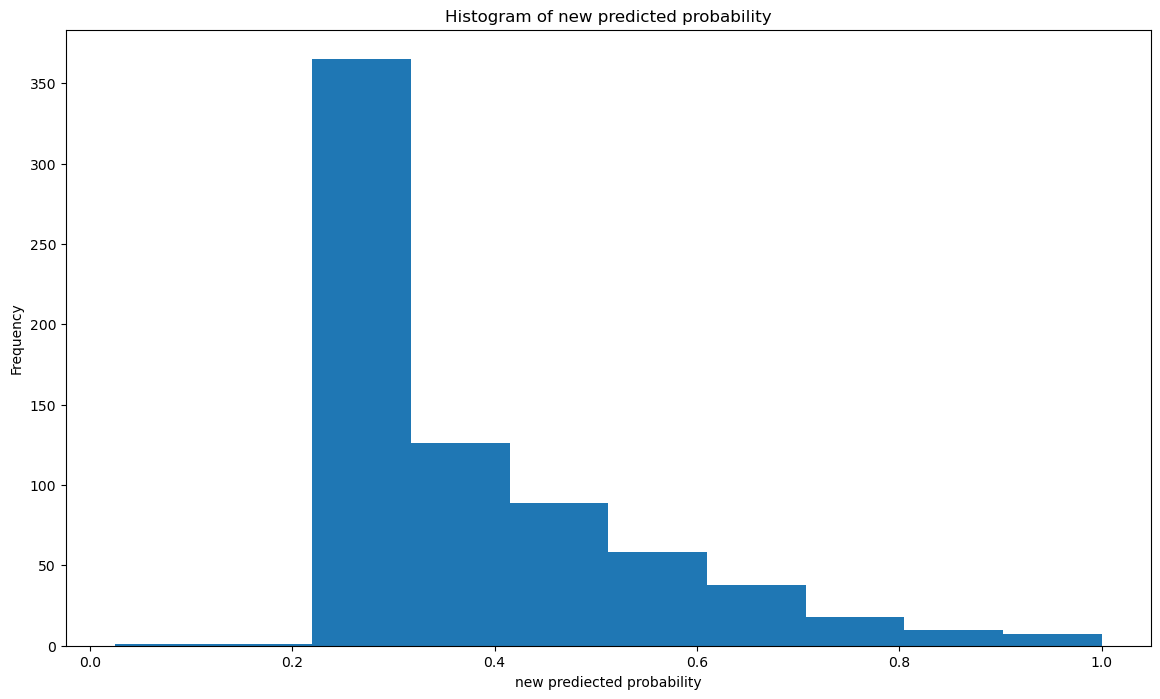

In [7]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

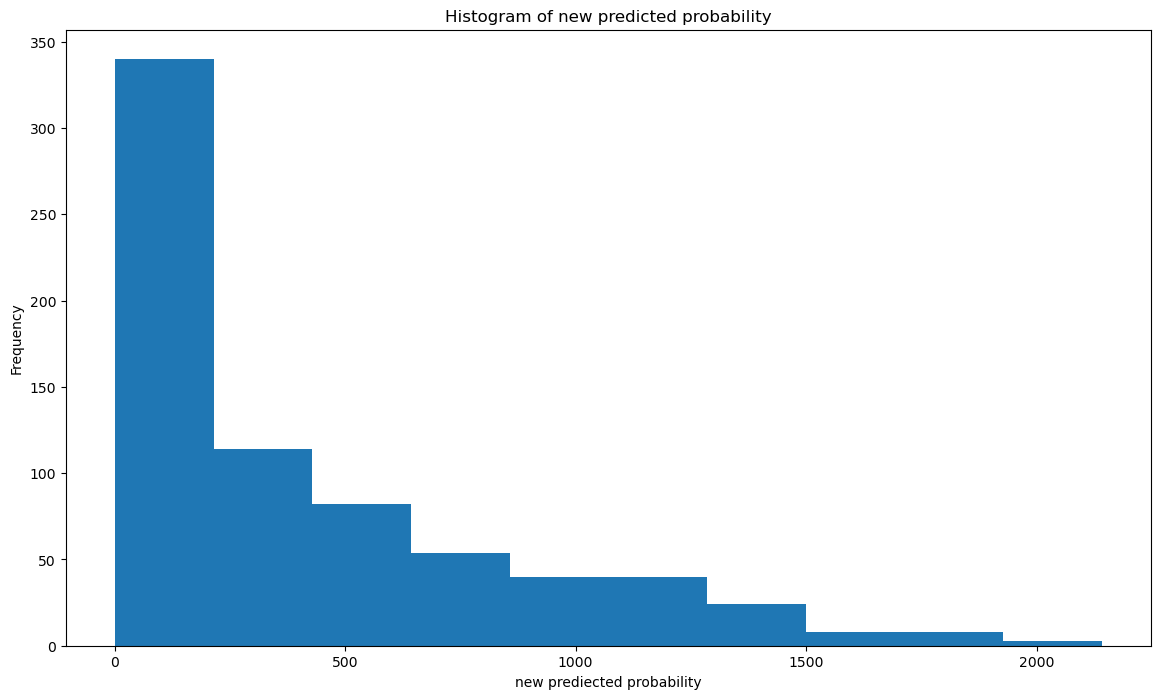

In [8]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [9]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(app_k.shape[0]):
    print("i", i)
    if app_k[i] != None:
        if (pred[i].item() > 0.25) != (new_pred_k[i].item() > 0.25):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.25
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.05260322991434298
new 0.8115478173821786
appro k 1133
flip label [1.]

i 1
old 0.44794800858339784
new 0.26279886283214
appro k 22
flip label [0.]

i 2
i 3
i 4
old 0.4554837611675701
new 0.2588119057725591
appro k 67
flip label [0.]

i 5
old 0.20574631931889653
new 0.2535418570720089
appro k 13
flip label [1.]

i 6
old 0.2627314255494395
new 0.2478696576025324
appro k 3
flip label [1.]

i 7
old 0.10732156290188119
new 0.3454774097815909
appro k 333
flip label [1.]

i 8
old 0.1580026011539243
new 0.2729695544266558
appro k 164
flip label [1.]

i 9
i 10
old 0.09728551824384017
new 0.424131765270917
appro k 591
flip label [1.]

i 11
old 0.0956506501654104
new 0.2786801629044768
appro k 318
flip label [1.]

i 12
old 0.17704108383028747
new 0.2621364257554411
appro k 100
flip label [1.]

i 13
old 0.14141456801138572
new 0.29738562042702754
appro k 211
flip label [1.]

i 14
old 0.08121635489554374
new 0.46946812178774755
appro k 505
flip label [1.]

i 15
old 0.4087050953004168
new 

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

639

In [35]:
app_k.shape

(1071,)

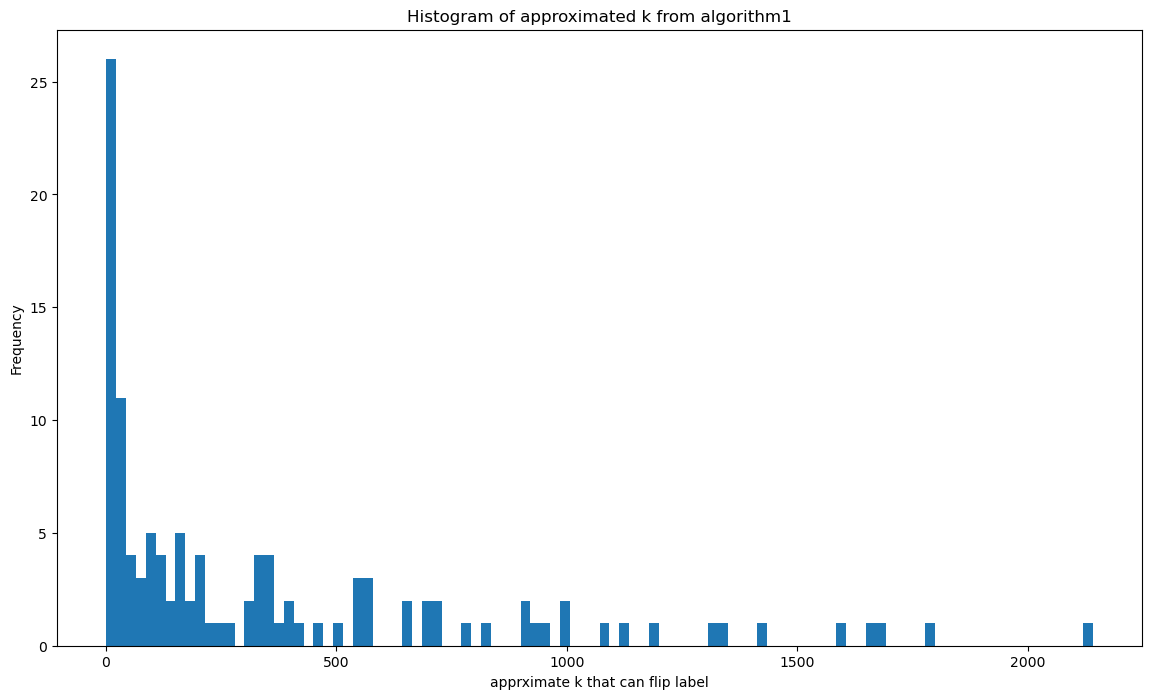

In [20]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

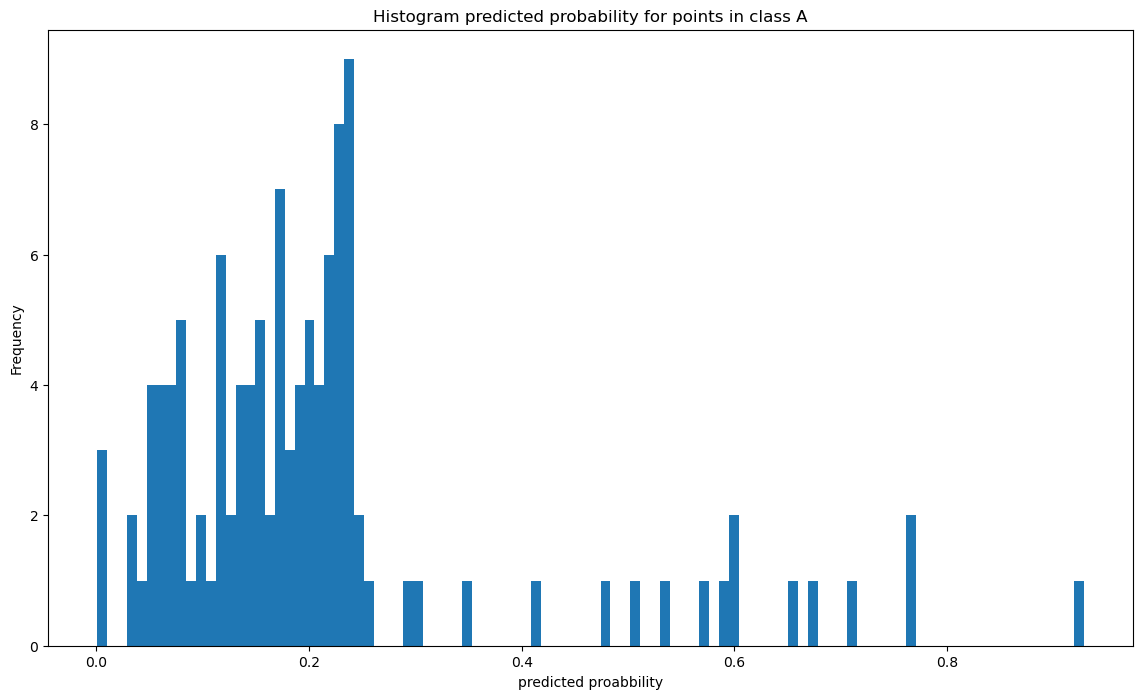

In [21]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [22]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

628

In [23]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.24756560275542558, 0.024872192142977593)

In [15]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.20382568763390888, 0.03137086929697369)